## Predicting Bourke Street Mall South

In [49]:
#Libraries
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from scipy.stats import skew
from sklearn import svm, neighbors


In [52]:
#Load in the data

df = pd.read_csv("IndDepVarUpdate.csv")
df

,Day Index,date,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,FlindersStSparkLaneCount,CollinsPlaceNorth,BourkeStMallSouth
0,0,1/1/15,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,2592.0,2813.0,4086.0,1711.0,21217.0
1,1,2/1/15,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,1848.0,4648.0,1952.0,2925.0,25256.0
2,2,3/1/15,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,1451.0,1428.0,1628.0,1306.0,17648.0
3,3,4/1/15,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,1047.0,1347.0,2063.0,1547.0,24428.0
4,4,5/1/15,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,3416.0,11483.0,2921.0,7781.0,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,27/8/21,0,6,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN,NaN,NaN,NaN,NaN
2431,2431,28/8/21,0,6,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN,NaN,NaN,NaN,NaN
2432,2432,29/8/21,0,6,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN,NaN,NaN,NaN,NaN
2433,2433,30/8/21,0,6,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN,NaN,NaN,NaN,NaN


In [51]:
#Get rid of columns not relevant for prediction or EDA

df = df.drop(columns = ["date", "SouthernCrossCount", "VictoriaPointCount", "FlindersStSparkLaneCount", "CollinsPlaceNorth"])

In [40]:
df

,Day Index,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,0,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,21217.0
1,1,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,25256.0
2,2,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,17648.0
3,3,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,24428.0
4,4,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,0,6,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN
2431,2431,0,6,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN
2432,2432,0,6,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN
2433,2433,0,6,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN


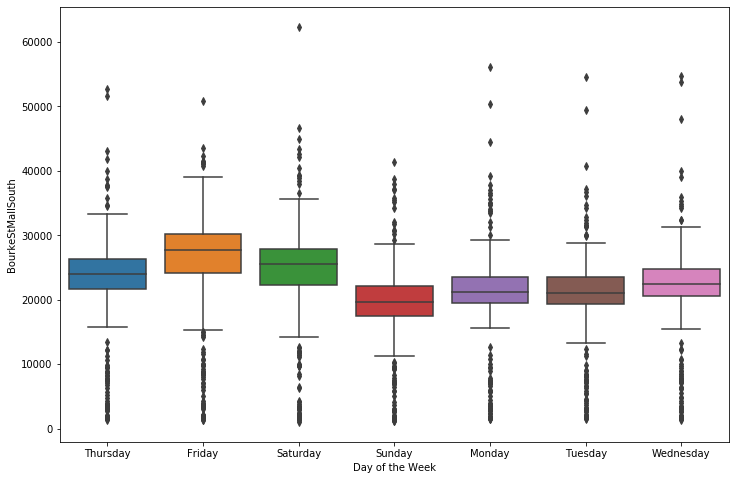

In [41]:
#Do some EDA for this sensor location


plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'BourkeStMallSouth',data = df)
plt.show()

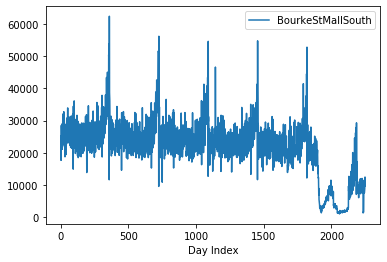

In [42]:

df.plot("Day Index", 'BourkeStMallSouth')

In [43]:
#Get rid of Columns not relevant for prediction

df = df.drop(columns = ["Day Index"])

In [44]:
df

,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,21217.0
1,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,25256.0
2,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,17648.0
3,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,24428.0
4,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,0,6,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN
2431,0,6,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN
2432,0,6,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN
2433,0,6,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN


In [45]:
#Drop rows with NaN
df = df.dropna()

In [46]:
df

,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,2015,1,1,1,Thursday,5,13.3,26.9,23.6,0.0,21217.0
1,0,2015,1,2,2,Friday,6,15.4,38.8,26.8,0.0,25256.0
2,0,2015,1,3,3,Saturday,7,20.0,38.2,26.5,0.0,17648.0
3,0,2015,1,4,4,Sunday,1,16.3,21.4,25.2,4.2,24428.0
4,0,2015,1,5,5,Monday,2,15.0,22.0,30.7,0.0,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,0,2021,2,24,55,Wednesday,4,13.0,20.2,23.3,0.0,8482.0
2247,0,2021,2,25,56,Thursday,5,11.3,24.3,18.9,0.0,8882.0
2248,0,2021,2,26,57,Friday,6,13.3,19.7,15.7,0.4,10074.0
2249,0,2021,2,27,58,Saturday,7,11.3,18.6,11.8,0.0,12477.0


In [47]:
#Replace Year with values from 0 to 6

df = df.replace(2015, 0)
df = df.replace(2016, 1)
df = df.replace(2017, 2)
df = df.replace(2018, 3)
df = df.replace(2019, 4)
df = df.replace(2020, 5)
df = df.replace(2021, 6)
df

,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,0,1,1,1,Thursday,5,13.3,26.9,23.6,0.0,21217.0
1,0,0,1,2,2,Friday,6,15.4,38.8,26.8,0.0,25256.0
2,0,0,1,3,3,Saturday,7,20.0,38.2,26.5,0.0,17648.0
3,0,0,1,4,4,Sunday,1,16.3,21.4,25.2,4.2,24428.0
4,0,0,1,5,5,Monday,2,15.0,22.0,30.7,0.0,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,0,6,2,24,55,Wednesday,4,13.0,20.2,23.3,0.0,8482.0
2247,0,6,2,25,56,Thursday,5,11.3,24.3,18.9,0.0,8882.0
2248,0,6,2,26,57,Friday,6,13.3,19.7,15.7,0.4,10074.0
2249,0,6,2,27,58,Saturday,7,11.3,18.6,11.8,0.0,12477.0
